In [1]:
from data.data_loading import load_data
from data.data_loading import plot_train_test
from data.data_transforms import data_transform_std
from data.data_splitting import train_test_split
import numpy as np
from utils.metrics import mse, mae, smape

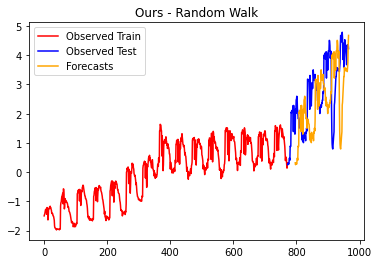

Normalized test - OT
N:170, MSE:2.244, MAE:1.243, sMAPE:52.199


In [5]:
file_name = 'dataset/illness/national_illness.csv'
training_ratio = 0.8
horizon = 24
target = 'OT'

data_raw, observed = load_data(file_name, target = target)
train_size = int(training_ratio*len(data_raw))
scaled_mean_std, df_raw_scaled = data_transform_std(data_raw, train_size)
train_data, val_data, test_data = train_test_split(df_raw_scaled)
train_data_OT = train_data[[target]]
test_data_OT = test_data[[target]]
forecasts = []
for i in range(test_data_OT.shape[0]-horizon):
    forecasts.append(df_raw_scaled[[target]].iloc[train_size+i-1,:])
plot_train_test(df_raw_scaled, train_size, train_data_OT, test_data_OT, forecasts)

actual = df_raw_scaled[[target]]
actual = actual[train_size+horizon:]
actual = np.array(actual)

stats = scaled_mean_std['scaledOT']
#print(stats.mean_, stats.scale_)

print("Normalized test - OT")
print('N:{}, MSE:{}, MAE:{}, sMAPE:{}'.format(len(actual),
                                              ('%.3f' %mse(actual, forecasts)),
                                              ('%.3f' %mae(actual, forecasts)),
                                              ('%.3f' %smape(actual, forecasts))))

In [3]:
actual

array([[1.53230039],
       [2.15558795],
       [2.0094838 ],
       [2.47471616],
       [2.48875779],
       [2.59744623],
       [2.54766307],
       [2.15837825],
       [2.09430877],
       [1.90644034],
       [1.82295042],
       [1.86931654],
       [1.50391235],
       [1.77566564],
       [1.71078055],
       [1.76702431],
       [1.80656065],
       [1.68045219],
       [1.64987913],
       [1.6370309 ],
       [1.45334791],
       [1.11734056],
       [1.30808514],
       [1.06857478],
       [1.08517919],
       [1.18238019],
       [1.00797816],
       [1.36220399],
       [1.25896307],
       [1.18900392],
       [1.24982378],
       [1.16462533],
       [1.2263252 ],
       [1.07494953],
       [1.37147635],
       [1.32949314],
       [1.50908084],
       [1.40711486],
       [1.75062596],
       [3.17988387],
       [3.18066086],
       [3.13166757],
       [3.13779334],
       [3.14695409],
       [3.1105343 ],
       [2.77201139],
       [2.15009751],
       [3.309

In [4]:
forecasts

[OT    0.3182
 Name: 771, dtype: float64,
 OT    0.254847
 Name: 772, dtype: float64,
 OT    0.303712
 Name: 773, dtype: float64,
 OT    0.279423
 Name: 774, dtype: float64,
 OT    0.291555
 Name: 775, dtype: float64,
 OT    0.279209
 Name: 776, dtype: float64,
 OT    0.45583
 Name: 777, dtype: float64,
 OT    0.484545
 Name: 778, dtype: float64,
 OT    0.407296
 Name: 779, dtype: float64,
 OT    0.890464
 Name: 780, dtype: float64,
 OT    0.87097
 Name: 781, dtype: float64,
 OT    0.891846
 Name: 782, dtype: float64,
 OT    2.050098
 Name: 783, dtype: float64,
 OT    2.023066
 Name: 784, dtype: float64,
 OT    2.110986
 Name: 785, dtype: float64,
 OT    2.067724
 Name: 786, dtype: float64,
 OT    2.046869
 Name: 787, dtype: float64,
 OT    2.12817
 Name: 788, dtype: float64,
 OT    2.270737
 Name: 789, dtype: float64,
 OT    1.386531
 Name: 790, dtype: float64,
 OT    2.283873
 Name: 791, dtype: float64,
 OT    2.038469
 Name: 792, dtype: float64,
 OT    1.970214
 Name: 793, dtype: fl

In [6]:
df_raw_scaled

,date,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 5-24,ILITOTAL,NUM. OF PROVIDERS,OT
0,2002-01-01,-0.443887,-0.504370,-1.054021,-0.747520,-0.880510,-1.263995,-1.497110
1,2002-01-08,-0.351949,-0.460286,-1.006637,-0.731784,-0.857932,-1.201258,-1.455101
2,2002-01-15,-0.363688,-0.536323,-1.025872,-0.730375,-0.867858,-1.108164,-1.428855
3,2002-01-22,-0.218049,-0.428466,-0.985525,-0.691153,-0.821720,-1.043404,-1.364279
4,2002-01-29,-0.237038,-0.384303,-0.940956,-0.657333,-0.788126,-0.950310,-1.296900
...,...,...,...,...,...,...,...,...
961,2020-06-02,-0.762095,-0.787491,-0.034089,-0.107993,0.303254,3.803530,4.291632
962,2020-06-09,-0.714891,-0.732485,0.175621,-0.049277,0.419526,3.795435,4.347352
963,2020-06-16,-0.702473,-0.703514,0.304638,-0.045050,0.464245,3.639604,4.304703
964,2020-06-23,-0.672591,-0.676473,0.424740,-0.039883,0.530780,3.414965,4.367850


In [8]:
data_raw, observed = load_data(file_name, target = target)
data_raw

,date,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 5-24,ILITOTAL,NUM. OF PROVIDERS,OT
0,2002-01-01,1.222620,1.166680,582,805,2060,754,176569
1,2002-01-08,1.333440,1.216500,683,872,2267,785,186355
2,2002-01-15,1.319290,1.130570,642,878,2176,831,192469
3,2002-01-22,1.494840,1.252460,728,1045,2599,863,207512
4,2002-01-29,1.471950,1.302370,823,1189,2907,909,223208
...,...,...,...,...,...,...,...,...
961,2020-06-02,0.839059,0.846722,2756,3528,12913,3258,1525058
962,2020-06-09,0.895958,0.908885,3203,3778,13979,3254,1538038
963,2020-06-16,0.910926,0.941625,3478,3796,14389,3177,1528103
964,2020-06-23,0.946945,0.972185,3734,3818,14999,3066,1542813
